# Install Libraries

In [13]:
import sys
print(sys.executable) 


/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/bin/python


In [16]:
!/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/bin/python -m pip install -r requirement.txt

import pandas as pd


  Using cached matplotlib-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.0.0-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
  Using cached scipy-1.7.3-cp38-cp38-macosx_10_9_x86_64.whl (33.0 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.10-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)


In [21]:
!/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/bin/python -m pip install yfinance --upgrade --no-cache-dir


  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=b175a401e840fdbe485d6f933e7ffbc0727d035dfc025f628b9d776556f4b352
  Stored in directory: /private/var/folders/9l/n7bj18r50b166tr2vf17df900000gp/T/pip-ephem-wheel-cache-6b7g8pef/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
from datetime import datetime

# import fix_yahoo_finance as yf

from collections import deque
import random


In [26]:
!/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/bin/python -m pip install tensorflow

     |████████████████████████████████| 207.1 MB 155 kB/s             
     |████████████████████████████████| 57 kB 10.8 MB/s            
     |████████████████████████████████| 12.2 MB 11.4 MB/s            
     |████████████████████████████████| 1.3 MB 51.8 MB/s            
     |████████████████████████████████| 65 kB 8.4 MB/s             
     |████████████████████████████████| 4.2 MB 31.8 MB/s            
     |████████████████████████████████| 1.0 MB 44.4 MB/s            
     |████████████████████████████████| 3.1 MB 25.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 126 kB 39.8 MB/s            
     |████████████████████████████████| 463 kB 39.0 MB/s            
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
     |████████████████████████████████| 42 kB 2.6 MB/s             
     |████████████████████████████████| 5.8 MB 14.7 MB/s            
     |████████████████████████████████| 1.6 MB 44.1 MB/s           

In [29]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()


In [71]:
df_full = DataReader('RELIANCE.NS', data_source='yahoo', start='2008-01-01', end=datetime.now())

df_full.reset_index().to_csv('RELIANCE.NS.csv', index=False)
df_full.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-01,717.944580,702.119629,715.715759,705.376221,4864461.0,634.321167
2008-01-02,714.229797,696.225464,707.047913,708.719543,12588005.0,637.327820
2008-01-03,725.621826,700.918518,706.304932,719.108582,13939233.0,646.670288
2008-01-04,747.861023,719.182861,719.182861,741.223938,16366255.0,666.557983
2008-01-07,750.387085,733.051392,736.716675,747.972473,12650730.0,672.626648


In [72]:
df_full.drop('Adj Close', axis=1, inplace=True)

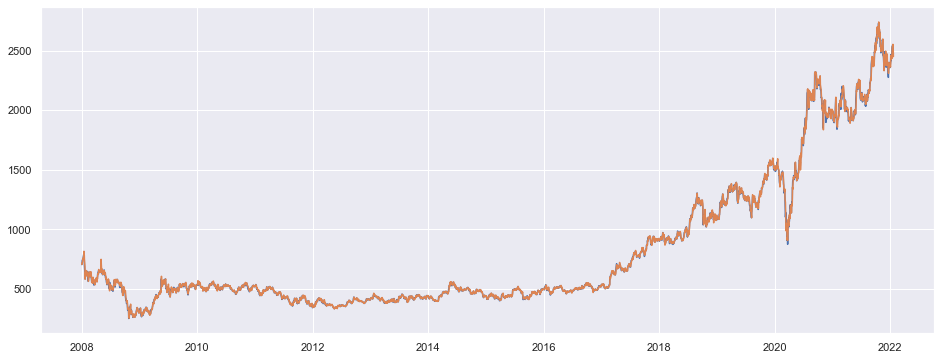

In [73]:
# Moving average

# ma_day = [10]
plt.figure(figsize=(16, 6))

# for ma in ma_day:
#         column_name = "MA"
#         df_full[column_name] = df['Close'].rolling(ma).mean()

# plt.plot(df_full[['Close', 'MA']])

plt.plot(df_full[['Close', 'Open']])

In [74]:
df = df_full.copy()
name = 'Q-learning agent'
class Agent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []
        self.gamma = 0.50
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        tf.reset_default_graph()
        self.sess = tf.InteractiveSession()
        self.X = tf.placeholder(tf.float32, [None, self.state_size])
        self.Y = tf.placeholder(tf.float32, [None, self.action_size])
        feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed, self.action_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(
            self.cost
        )
        self.sess.run(tf.global_variables_initializer())
    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                target[action] += self.gamma * np.amax(Q_new[i])
            X[i] = state
            Y[i] = target
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest, 
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))


In [75]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [76]:
# Train agent

close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip, 
              batch_size = batch_size)
agent.train(iterations = 100, checkpoint = 10, initial_money = initial_money)

/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/lib/python3.8/site-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/var/folders/9l/n7bj18r50b166tr2vf17df900000gp/T/ipykernel_7662/2643946452.py:22: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
/Users/gopaljoshi/Documents/GitHub/Object-Detection-Python/venv/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/var/folders/9l/n7bj18r50b1

epoch: 10, total rewards: 4140.750732.3, cost: 0.365339, total money: 11772.600830
epoch: 20, total rewards: 3784.411133.3, cost: 0.119087, total money: 13784.411133
epoch: 30, total rewards: 1892.350189.3, cost: 0.067237, total money: 11892.350189
epoch: 40, total rewards: 1584.199432.3, cost: 0.037090, total money: 11584.199432
epoch: 50, total rewards: 2868.027893.3, cost: 0.311535, total money: 12868.027893
epoch: 60, total rewards: 2459.977142.3, cost: 0.043411, total money: 12459.977142
epoch: 70, total rewards: 2067.707916.3, cost: 0.035031, total money: 12067.707916
epoch: 80, total rewards: 2455.742981.3, cost: 0.040075, total money: 12455.742981
epoch: 90, total rewards: 1706.898651.3, cost: 0.015801, total money: 11706.898651
epoch: 100, total rewards: 1131.099976.3, cost: 0.018918, total money: 11131.099976


In [77]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)


day 12: buy 1 unit at price 742.103088, total balance 9257.896912
day 13, sell 1 unit at price 693.327942, investment -6.572557 %, total balance 9951.224854,
day 16: buy 1 unit at price 631.687256, total balance 9319.537598
day 17: buy 1 unit at price 616.382324, total balance 8703.155273
day 20, sell 1 unit at price 638.175720, investment 1.027164 %, total balance 9341.330994,
day 21, sell 1 unit at price 612.172241, investment -0.683031 %, total balance 9953.503235,
day 22: buy 1 unit at price 613.905762, total balance 9339.597473
day 23: buy 1 unit at price 629.718384, total balance 8709.879089
day 24: buy 1 unit at price 641.717163, total balance 8068.161926
day 25, sell 1 unit at price 648.131348, investment 5.575055 %, total balance 8716.293274,
day 29, sell 1 unit at price 563.904724, investment -10.451284 %, total balance 9280.197998,
day 30: buy 1 unit at price 575.754944, total balance 8704.443054
day 31, sell 1 unit at price 591.765625, investment -7.784043 %, total balance 

day 309, sell 1 unit at price 439.224091, investment 6.098946 %, total balance 8870.506470,
day 310: buy 1 unit at price 453.216461, total balance 8417.290009
day 311, sell 1 unit at price 429.677094, investment 0.570968 %, total balance 8846.967102,
day 313, sell 1 unit at price 424.823090, investment -1.172405 %, total balance 9271.790192,
day 314, sell 1 unit at price 422.519928, investment -6.773040 %, total balance 9694.310120,
day 327: buy 1 unit at price 461.029907, total balance 9233.280212
day 329, sell 1 unit at price 478.712280, investment 3.835407 %, total balance 9711.992493,
day 331: buy 1 unit at price 483.095734, total balance 9228.896759
day 335: buy 1 unit at price 523.896484, total balance 8705.000275
day 337: buy 1 unit at price 543.535339, total balance 8161.464935
day 341: buy 1 unit at price 562.641724, total balance 7598.823212
day 343: buy 1 unit at price 564.449585, total balance 7034.373627
day 344, sell 1 unit at price 556.202759, investment 15.133031 %, tot

day 621, sell 1 unit at price 531.685181, investment 1.811543 %, total balance 5871.384766,
day 623: buy 1 unit at price 523.066833, total balance 5348.317932
day 625: buy 1 unit at price 524.230835, total balance 4824.087097
day 627, sell 1 unit at price 525.246216, investment -0.487960 %, total balance 5349.333313,
day 629: buy 1 unit at price 521.803833, total balance 4827.529480
day 631, sell 1 unit at price 500.332336, investment -4.967307 %, total balance 5327.861816,
day 633, sell 1 unit at price 502.511688, investment -6.909210 %, total balance 5830.373505,
day 635: buy 1 unit at price 503.254639, total balance 5327.118866
day 637: buy 1 unit at price 495.354523, total balance 4831.764343
day 638: buy 1 unit at price 492.135040, total balance 4339.629303
day 639: buy 1 unit at price 489.311798, total balance 3850.317505
day 640: buy 1 unit at price 487.008636, total balance 3363.308868
day 641, sell 1 unit at price 481.733643, investment -9.630665 %, total balance 3845.042511,


day 996, sell 1 unit at price 367.541077, investment 0.698871 %, total balance 8558.142181,
day 997, sell 1 unit at price 386.214081, investment 6.552338 %, total balance 8944.356262,
day 998, sell 1 unit at price 389.136383, investment 10.197066 %, total balance 9333.492645,
day 1000: buy 1 unit at price 382.152588, total balance 8951.340057
day 1005, sell 1 unit at price 404.713715, investment 5.903696 %, total balance 9356.053772,
day 1006: buy 1 unit at price 411.697510, total balance 8944.356262
day 1007: buy 1 unit at price 410.731659, total balance 8533.624603
day 1008: buy 1 unit at price 415.214172, total balance 8118.410431
day 1009: buy 1 unit at price 412.589081, total balance 7705.821350
day 1010, sell 1 unit at price 418.309845, investment 1.606115 %, total balance 8124.131195,
day 1011, sell 1 unit at price 425.169800, investment 3.515225 %, total balance 8549.300995,
day 1012, sell 1 unit at price 422.916168, investment 1.854945 %, total balance 8972.217163,
day 1014: b

day 1385: buy 1 unit at price 428.438843, total balance 9047.553162
day 1386: buy 1 unit at price 409.468658, total balance 8638.084503
day 1387: buy 1 unit at price 406.273926, total balance 8231.810577
day 1388, sell 1 unit at price 408.799988, investment -4.583818 %, total balance 8640.610565,
day 1391, sell 1 unit at price 405.902435, investment -0.870939 %, total balance 9046.513000,
day 1394: buy 1 unit at price 402.088593, total balance 8644.424408
day 1395, sell 1 unit at price 418.656555, investment 3.047852 %, total balance 9063.080963,
day 1400, sell 1 unit at price 427.225342, investment 6.251545 %, total balance 9490.306305,
day 1402: buy 1 unit at price 440.994812, total balance 9049.311493
day 1406, sell 1 unit at price 426.829102, investment -3.212217 %, total balance 9476.140594,
day 1407: buy 1 unit at price 425.045990, total balance 9051.094604
day 1408, sell 1 unit at price 431.881195, investment 1.608110 %, total balance 9482.975800,
day 1420: buy 1 unit at price 4

day 1791, sell 1 unit at price 459.816406, investment 0.634150 %, total balance 8785.759491,
day 1792, sell 1 unit at price 459.073456, investment 0.346455 %, total balance 9244.832947,
day 1793: buy 1 unit at price 438.666870, total balance 8806.166077
day 1794, sell 1 unit at price 434.110077, investment -1.038782 %, total balance 9240.276154,
day 1798: buy 1 unit at price 433.540466, total balance 8806.735687
day 1799: buy 1 unit at price 428.537903, total balance 8378.197784
day 1800: buy 1 unit at price 421.009247, total balance 7957.188538
day 1803: buy 1 unit at price 441.886353, total balance 7515.302185
day 1807: buy 1 unit at price 443.768524, total balance 7071.533661
day 1808, sell 1 unit at price 430.271454, investment -0.754027 %, total balance 7501.805115,
day 1809, sell 1 unit at price 438.394470, investment 2.300046 %, total balance 7940.199585,
day 1811, sell 1 unit at price 432.871796, investment 2.817646 %, total balance 8373.071381,
day 1814: buy 1 unit at price 45

day 2184: buy 1 unit at price 491.094910, total balance 8975.807831
day 2185: buy 1 unit at price 496.023193, total balance 8479.784637
day 2186: buy 1 unit at price 499.762756, total balance 7980.021881
day 2187: buy 1 unit at price 489.039398, total balance 7490.982483
day 2188, sell 1 unit at price 492.184570, investment 0.221884 %, total balance 7983.167053,
day 2191, sell 1 unit at price 490.376709, investment -1.138351 %, total balance 8473.543762,
day 2193: buy 1 unit at price 492.704651, total balance 7980.839111
day 2194: buy 1 unit at price 492.258881, total balance 7488.580231
day 2195, sell 1 unit at price 497.880585, investment -0.376613 %, total balance 7986.460815,
day 2197: buy 1 unit at price 505.235870, total balance 7481.224945
day 2200: buy 1 unit at price 515.018127, total balance 6966.206818
day 2201, sell 1 unit at price 524.775635, investment 7.307435 %, total balance 7490.982452,
day 2202: buy 1 unit at price 521.531433, total balance 6969.451019
day 2203, sell

day 2504: buy 1 unit at price 915.422729, total balance 8333.075348
day 2506, sell 1 unit at price 881.395264, investment -6.391374 %, total balance 9214.470612,
day 2507, sell 1 unit at price 902.891479, investment -1.368903 %, total balance 10117.362091,
day 2513: buy 1 unit at price 891.598511, total balance 9225.763580
day 2514, sell 1 unit at price 887.091248, investment -0.505526 %, total balance 10112.854828,
day 2516: buy 1 unit at price 888.478088, total balance 9224.376740
day 2517, sell 1 unit at price 899.622498, investment 1.254326 %, total balance 10123.999237,
day 2521: buy 1 unit at price 874.411438, total balance 9249.587799
day 2522: buy 1 unit at price 884.565186, total balance 8365.022614
day 2523, sell 1 unit at price 891.103210, investment 1.908915 %, total balance 9256.125824,
day 2525: buy 1 unit at price 899.671997, total balance 8356.453827
day 2527, sell 1 unit at price 907.398743, investment 2.581331 %, total balance 9263.852570,
day 2528, sell 1 unit at pri

day 2868: buy 1 unit at price 1251.437622, total balance 5454.660065
day 2869: buy 1 unit at price 1230.089966, total balance 4224.570099
day 2870: buy 1 unit at price 1236.826172, total balance 2987.743927
day 2871: buy 1 unit at price 1195.071899, total balance 1792.672028
day 2872, sell 1 unit at price 1189.871216, investment -7.074889 %, total balance 2982.543243,
day 2880: buy 1 unit at price 1186.205933, total balance 1796.337311
day 2882: buy 1 unit at price 1167.978760, total balance 628.358551
day 2883, sell 1 unit at price 1242.571655, investment 0.609589 %, total balance 1870.930206,
day 2884, sell 1 unit at price 1227.563965, investment -2.796403 %, total balance 3098.494171,
day 2887: buy 1 unit at price 1284.623047, total balance 1813.871124
day 2889: buy 1 unit at price 1319.740234, total balance 494.130890
day 2896, sell 1 unit at price 1339.899048, investment 7.068784 %, total balance 1834.029938,
day 2897: buy 1 unit at price 1345.248413, total balance 488.781525
day 

day 3258: buy 1 unit at price 2047.300049, total balance 8866.507599
day 3259, sell 1 unit at price 1991.449951, investment -2.727988 %, total balance 10857.957550,
day 3262: buy 1 unit at price 2003.099976, total balance 8854.857574
day 3263, sell 1 unit at price 2021.849976, investment 0.936049 %, total balance 10876.707550,
day 3264: buy 1 unit at price 1992.599976, total balance 8884.107574
day 3266, sell 1 unit at price 2002.849976, investment 0.514403 %, total balance 10886.957550,
day 3268: buy 1 unit at price 1982.050049, total balance 8904.907501
day 3269: buy 1 unit at price 1911.150024, total balance 6993.757477
day 3273: buy 1 unit at price 1901.699951, total balance 5092.057526
day 3274: buy 1 unit at price 1901.150024, total balance 3190.907501
day 3276: buy 1 unit at price 1904.349976, total balance 1286.557526
day 3279, sell 1 unit at price 1997.300049, investment 0.769405 %, total balance 3283.857574,
day 3280: buy 1 unit at price 2024.050049, total balance 1259.807526

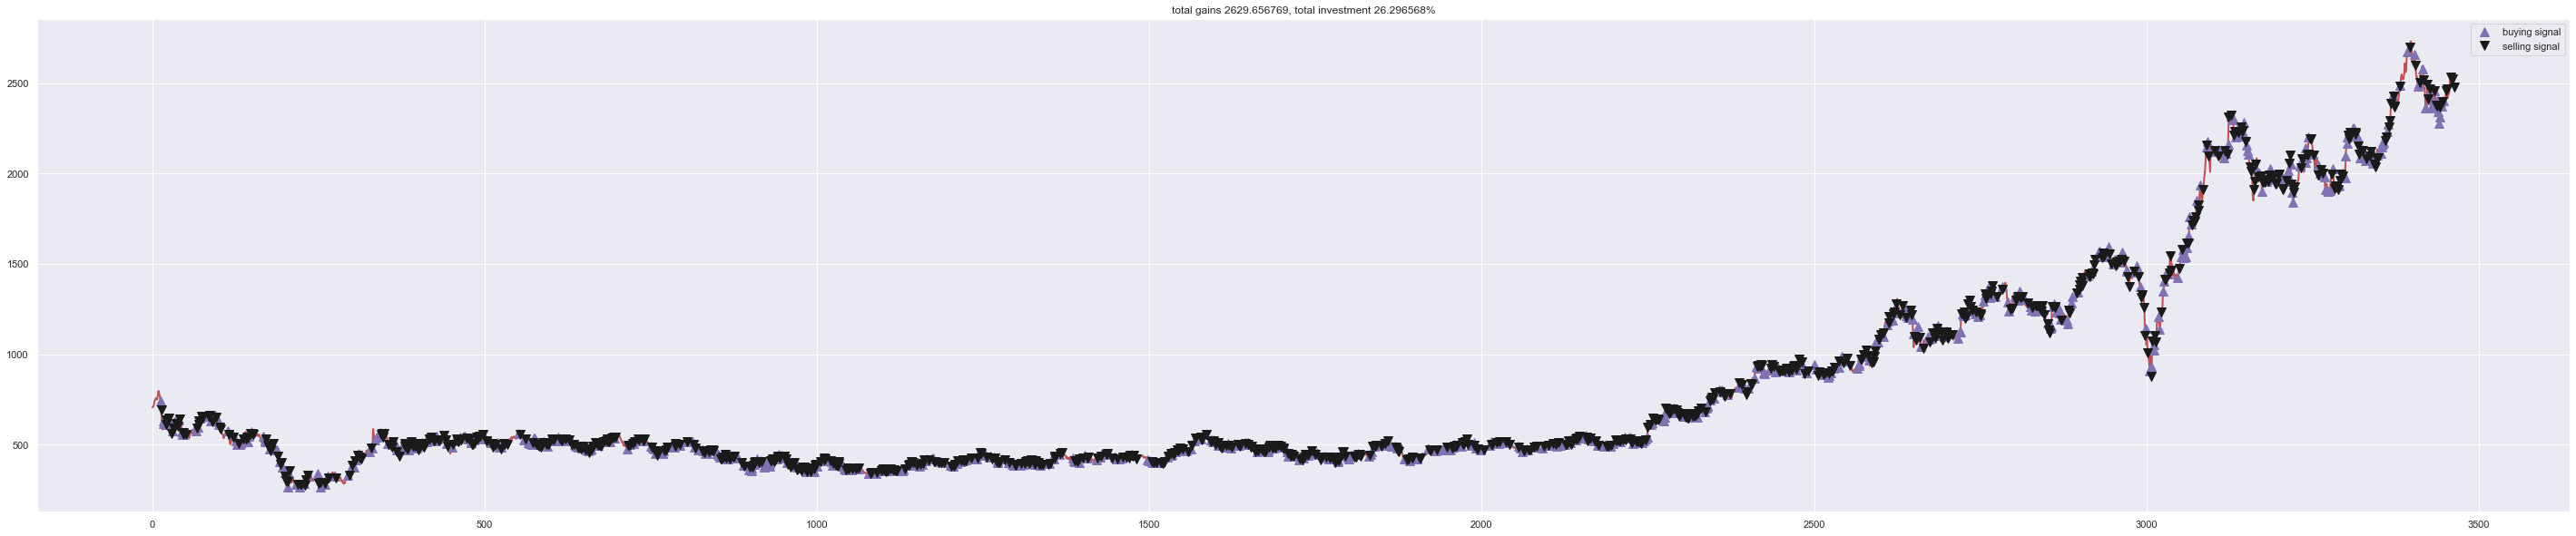

In [78]:
fig = plt.figure(figsize = (50,10))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig(name+'.png')
plt.show()
